
#### Overview:

   This notebook will compile the analysis plan of the project. We will use the psycopg2 package for python to conenct to and query the databse that was made with PostgreSQL. Once we connect, and get results for our queries that provide us with the informaton we need, all of the relevant data will be combined into one Pandas DataFrame for analysis. The first phase of analysis is exploratory data analysis. There will be specific EDA questions listed, and answered in this phase. The second phase of analysis is the correlation analysis. In this part of the notebook, specific relationships will be analyzed for evidence of linear correlation. Both the H0 and the H1 hypotheses will be listed for each relationship being analyzed. The peasrson coefficient and a p-value will be equated and used to either reject or fail to reject the null hypothesis, and determine what further analysis happens for that relationship. The last phase of analysis is the Linear Regression analysis. Based on the correlations that we find. There are three separate regression models that look at tree coverage in census tracts and seeing where the different rates of these health incidents fall. If there is a relationship, and model can be fit, the models will be used to predict what tree canopy percentage is needed to start seeing positive health outcomes in the respective issues we are analyzing. The metrics that will be used to evaluate the models are r-squared, mean absolute error, and mean absolute percentage error. 



In [2]:
#Import packages for the notebook


import psycopg2
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import scipy.stats




Matplotlib is building the font cache; this may take a moment.


##### The first step is to use the psycopg2 package to conenct to the postgreSQL database, and execute queries to get extract the data we need
##### First, a connection is made, then we create and use a cursor object with execute method to query database and use fetchall method to get query results
##### We will use this cursor method to query the records we need from the various tables and relations in the database in order to answer our questions

In [3]:
#create object with connect method for connection to Database with necessary Parameters
conn = psycopg2.connect(host="XXX", port = XXX, database="XXX", user="XXX", password="XXXX") ## redacted


#Create Cursor Object to run SQL queries to the database
cur = conn.cursor()

### Extract Data From Database 
#### Queries must be executed on the database to extract the infomation we need for analysis

### Tree canopy information

In [4]:
# Select all Tree canopy assessment information from canopy assessment table

cur.execute('''SELECT * FROM denver_canopy_assessment''')
tree_canopy_result = cur.fetchall()
tree_canopy_df = pd.DataFrame(tree_canopy_result)

#rename Columns 
tree_atts = { 0: "FIPS code",
                 1: "tree canopy pct",
                 2: "num trees",
                 3: "num plant sites"
                }
tree_canopy_df = tree_canopy_df.rename(columns = tree_atts)

#change data types to run analysis 

tree_canopy_df['FIPS code'] = tree_canopy_df['FIPS code'].astype(str)
tree_canopy_df['tree canopy pct'] = tree_canopy_df['tree canopy pct'].astype(float)
tree_canopy_df['num trees'] = tree_canopy_df['num trees'].astype(float)
tree_canopy_df['num plant sites'] = tree_canopy_df['num plant sites'].astype(float)

#print dataframe to see if the query worked properly
print(tree_canopy_df)


      FIPS code  tree canopy pct  num trees  num plant sites
0    8031000102            28.91    20109.0           5221.0
1    8031000201            17.05    12269.0           5893.0
2    8031000202            23.03    14065.0           5058.0
3    8031000301            32.45    22496.0           4087.0
4    8031000302            30.96    15968.0           3312.0
..          ...              ...        ...              ...
136  8031015500            17.39     4688.0           1209.0
137  8031015600            17.33    19627.0          11425.0
138  8031015700            28.86    22156.0           7299.0
139  8031980000             1.27     8503.0         180857.0
140  8031980100             5.92     9329.0           7725.0

[141 rows x 4 columns]


### Income and Poverty information

In [5]:
## Query database for relevant records on income and tree canopy pct
cur.execute('''SELECT mean_income, Denver_canopy_assessment.FIPS_code, census_tract_name, tree_canopy_pct
               FROM Denver_canopy_assessment, income_poverty
               WHERE Denver_canopy_assessment.FIPS_code = income_poverty.FIPS_code''')

income_tree = cur.fetchall()

income_tree_df = pd.DataFrame(income_tree)


#rename Columns 
income_tree_atts = { 0: "mean income",
                 1: "FIPS code",
                 2: "census tract name",
                 3: "tree canopy pct"
                }
income_tree_df = income_tree_df.rename(columns = income_tree_atts)



#change data types to run analysis 

income_tree_df['mean income'] = income_tree_df['mean income'].astype(float)
income_tree_df['FIPS code'] = income_tree_df['FIPS code'].astype(str)
income_tree_df['census tract name'] = income_tree_df['census tract name'].astype(str)
income_tree_df['tree canopy pct'] = income_tree_df['tree canopy pct'].astype(float)





In [6]:
## Select all records from poverty_tree_pct relation
cur.execute('''SELECT * FROM poverty_tree_pct''')
pov_tree_result = cur.fetchall()

pov_tree_df = pd.DataFrame(pov_tree_result)

#rename Columns 
pov_tree_atts = { 0: "census tract name",
                 1: "FIPS code",
                 2: "tree canopy pct",
                 3: "pct poverty"
                }
pov_tree_df = pov_tree_df.rename(columns = pov_tree_atts)


#change data types to run analysis 

pov_tree_df['census tract name'] = pov_tree_df['census tract name'].astype(str)
pov_tree_df['FIPS code'] = pov_tree_df['FIPS code'].astype(str)
pov_tree_df['tree canopy pct'] = pov_tree_df['tree canopy pct'].astype(float)
pov_tree_df['pct poverty'] = pov_tree_df['pct poverty'].astype(float)

### Adult Asthma Prevalence information

In [7]:
## Collect relevant information from Asthma_Prevalence_Tree_Pct relation

cur.execute('''SELECT census_tract_name, FIPS_code, asthma_tract_estimate, asthma_state_estimate 
               FROM Asthma_Prevalence_Tree_Pct''')

adult_asthma_tree_pct = cur.fetchall()
adult_asthma_tree_df = pd.DataFrame(adult_asthma_tree_pct)

#rename columns 
adult_asthma_atts = { 0: 'Census Tract Name',
                     1: 'FIPS code',
                     2:'asthma tract estimate',
                     3: 'asthma state estimate'
                    }

adult_asthma_tree_df = adult_asthma_tree_df.rename(columns = adult_asthma_atts)

#change data types to run analysis 
adult_asthma_tree_df['Census Tract Name'] = adult_asthma_tree_df['Census Tract Name'].astype(str)
adult_asthma_tree_df['FIPS code'] = adult_asthma_tree_df['FIPS code'].astype(str)
adult_asthma_tree_df['asthma tract estimate'] = adult_asthma_tree_df['asthma tract estimate'].astype(float)
adult_asthma_tree_df['asthma state estimate'] = adult_asthma_tree_df['asthma state estimate'].astype(float)



The CDPHE noted that for this dataset if any tract that didn't have enough people for a tract estimate for 100,000 people they instered 0.00 as the number. This is considered a missing value, and we decided to replace the missing data with the average of the tract estimates for the city to have a more accurate dataset to work with

In [8]:

#find mean estimate for the city to use value as imputed value for datframe

cur.execute('''SELECT AVG(asthma_tract_estimate) AS avg_tract_est FROM Asthma_Prevalence_Tree_Pct''')
avg_tract_est = cur.fetchall()
avg_tract_est = pd.DataFrame(avg_tract_est)

avg_tract_est = float(avg_tract_est._get_value(0,0))

avg_tract_est = round(avg_tract_est,2)

# replace instances of 0.00 with average tract estimate 
adult_asthma_tree_df['asthma tract estimate'] = adult_asthma_tree_df['asthma tract estimate'].replace([0.0], avg_tract_est)
        
    



### Asthma Hospitalization Rate information

In [9]:
## SELECT relevant records from the Asthma_Hosp_Tree_pct relation 
cur.execute('''SELECT census_tract_name, FIPS_code, asthma_tract_hosp_rate, asthma_state_hosp_rate 
               FROM  Asthma_Hosp_Tree_pct''')
asthma_hospt_tree_pct = cur.fetchall()
asthma_hospt_tree_df = pd.DataFrame(asthma_hospt_tree_pct)

#rename columns 
asthma_hospt_atts = { 0: 'Census Tract Name',
                     1: 'FIPS code',
                     2:'asthma tract hospt rate',
                     3: 'asthma state hospt rate'
                    }

asthma_hospt_tree_df = asthma_hospt_tree_df.rename(columns = asthma_hospt_atts)

#change data types to run analysis 
asthma_hospt_tree_df['Census Tract Name'] = asthma_hospt_tree_df['Census Tract Name'].astype(str)
asthma_hospt_tree_df['FIPS code'] = asthma_hospt_tree_df['FIPS code'].astype(str)
asthma_hospt_tree_df['asthma tract hospt rate'] = asthma_hospt_tree_df['asthma tract hospt rate'].astype(float)
asthma_hospt_tree_df['asthma state hospt rate'] = asthma_hospt_tree_df['asthma state hospt rate'].astype(float)




The CDPHE noted that for this dataset if any tract that didn't have enough people for a tract estimate for 100,000 people they instered 0.00 as the number. This is considered a missing value, and we decided to replace the missing data with the average of the tract hospital rates for the city to have a more accurate dataset to work with

In [10]:

#find mean hospital rate for the city to use value as imputed value for dataframe

cur.execute('''SELECT AVG(asthma_tract_hosp_rate) AS avg_tract_rate FROM Asthma_Hosp_Tree_Pct''')
avg_tract_rate = cur.fetchall()
avg_tract_rate = pd.DataFrame(avg_tract_rate)

avg_tract_rate = float(avg_tract_rate._get_value(0,0))

avg_tract_rate = round(avg_tract_rate,2)




In [11]:
# replace instances of 0.00 with average 
asthma_hospt_tree_df['asthma tract hospt rate'] = asthma_hospt_tree_df['asthma tract hospt rate'].replace([0.0], avg_tract_rate)




### Heart Disease Mortality information

In [12]:
## Select important records from HD_mort_tree_pct relation
cur.execute('''SELECT census_tract_name, FIPS_code, HD_tract_mort_rate, HD_state_mort_rate 
               FROM  HD_mort_tree_pct''')
HD_tree_pct = cur.fetchall()
HD_tree_df = pd.DataFrame(HD_tree_pct)

#rename columns 
HD_mort_atts = { 0: 'Census Tract Name',
                     1: 'FIPS code',
                     2:'HD tract mort rate',
                     3: 'HD state mort rate'
                    }

HD_tree_df = HD_tree_df.rename(columns = HD_mort_atts)

#change data types to run analysis 
HD_tree_df['Census Tract Name'] = HD_tree_df['Census Tract Name'].astype(str)
HD_tree_df['FIPS code'] = HD_tree_df['FIPS code'].astype(str)
HD_tree_df['HD tract mort rate'] = HD_tree_df['HD tract mort rate'].astype(float)
HD_tree_df['HD state mort rate'] = HD_tree_df['HD state mort rate'].astype(float)



The CDPHE noted that for this dataset if any tract that didn't have enough people for a tract estimate for 100,000 people they instered 0.00 as the number. This is considered a missing value, and we decided to replace the missing data with the average of the tract mortality rates for the city to have a more accurate dataset to work with

In [13]:
#find mean HD mortality rate for the city to use value as imputed value for datframe

cur.execute('''SELECT AVG(HD_tract_mort_rate) AS avg_HD_tract_rate FROM HD_mort_tree_pct''')
avg_HD_tract_rate = cur.fetchall()
avg_HD_tract_rate = pd.DataFrame(avg_HD_tract_rate)

avg_HD_tract_rate = float(avg_HD_tract_rate._get_value(0,0))

avg_HD_tract_rate = round(avg_HD_tract_rate,2)


# replace instances of 0.00 with average 

HD_tree_df['HD tract mort rate'] = HD_tree_df['HD tract mort rate'].replace([0.0], avg_HD_tract_rate)


### Create one dataframe of all pulled records to create features and labels dataframes to have what is needed for different phases of analysis

In [47]:
## CREATE ONE DATAFRAME TO PULL POSSIBLE FEATURES AND LABELS OUT OF

data = [income_tree_df['FIPS code'], adult_asthma_tree_df['asthma tract estimate'], asthma_hospt_tree_df['asthma tract hospt rate'],
        HD_tree_df['HD tract mort rate'], income_tree_df['mean income'], pov_tree_df['pct poverty'], income_tree_df['tree canopy pct']]

columns = ['FIPS codes', 'asthma tract estimate', 'asthma tract hospt rate', 'HD tract mort rate', 'mean income', 'pct poverty', 'tree canopy pct' ]

features_df = pd.concat(data, axis = 1, keys = columns)
features_df = features_df.dropna()

#create labels from features df - this will be used for regression analysis in phase 3 
labels_df = pd.DataFrame(features_df['tree canopy pct'])

#drop tree canopy pct from features
features = features_df.drop(['tree canopy pct'], axis = 1)

#print data frames
print(features)
print(labels_df)


     FIPS codes  asthma tract estimate  asthma tract hospt rate  \
0    8031000102                    8.9                   646.47   
1    8031000201                    8.2                  1003.01   
2    8031000202                    8.7                  1116.16   
3    8031000301                    9.0                   645.48   
4    8031000302                    9.2                   510.88   
..          ...                    ...                      ...   
134  8031015400                    8.9                   933.67   
135  8031015500                    8.7                   881.86   
136  8031015600                    8.8                   995.58   
137  8031015700                    8.1                   867.00   
138  8031980000                    8.4                   841.02   

     HD tract mort rate  mean income  pct poverty  
0                174.99     106831.0          9.9  
1                176.79      68907.0          9.7  
2                101.73      67871.0   

## Phase 1 EDA
#### The first phase of the analysis plan is to perform exploratory data analysis. We will use this to get a visual of how the data we are interested in is distributed, specifically checking that the data distribution is relatively normal; if there are any missing values, and if there are, how we deal with them; and to get a feel for any outliers in the data that we should be aware of. 

The questions we are looking to answer here are:

- How is tree canopy coverage distributed across the various census tracts?
- How is mean income distributed throughout the city?
- How are cases of adult asthma distributed?
- How is poverty distributed throuout the city?
- How are rates of asthma hospitalization distributed?
- How are heart disease mortality rates distributed?

- Are there outliers?

- What is the average tree canopy coverage in the city?
- What are the min and max tree canopy percentages in the city? 
- What is the average income and average percent poverty throughout the city ?
- What is the state average of adult asthma rates?
- What is the city average of adult asthma rates?
- What is the state average of asthma hospitalization rates?
- What is the city average of asthma hospitalization rates? 
- What is the state average of heart disease mortality rates?
- What is the city average of heart disease mortality rates?
- Where in the city do the asthma hospitalization rates fall below the state average?
- What are the cardiovascular mortality rates in the various census tracts?
- Where in the city do the cardiovascular mortality rates fall below the state average?




### EDA Questions
- How is tree canopy coverage distributed across the various census tracts?
- How is mean income distributed throughout the city?
- How are cases of adult asthma distributed?
- How is poverty distributed throuout the city?
- How are rates of asthma hospitalization distributed?
- How are heart disease mortality rates distributed?
- Are there outliers?

<Axes: ylabel='Count'>

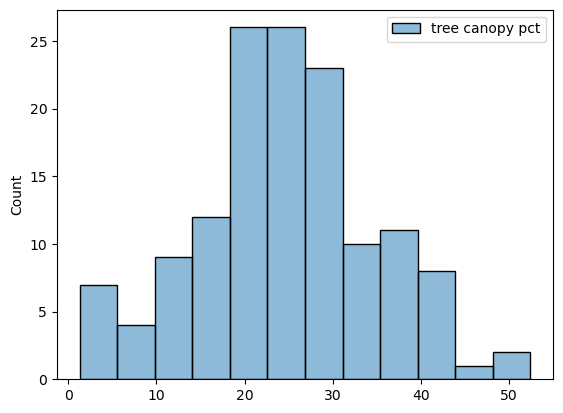

In [15]:
## create histogram to look at distribution of tree canopy percentage 
sns.histplot(labels_df)

#### Tree canopy percentage seems to be distributed pretty normally, with not many outliers.

array([[<Axes: title={'center': 'asthma tract estimate'}>,
        <Axes: title={'center': 'asthma tract hospt rate'}>],
       [<Axes: title={'center': 'HD tract mort rate'}>,
        <Axes: title={'center': 'mean income'}>],
       [<Axes: title={'center': 'pct poverty'}>, <Axes: >]], dtype=object)

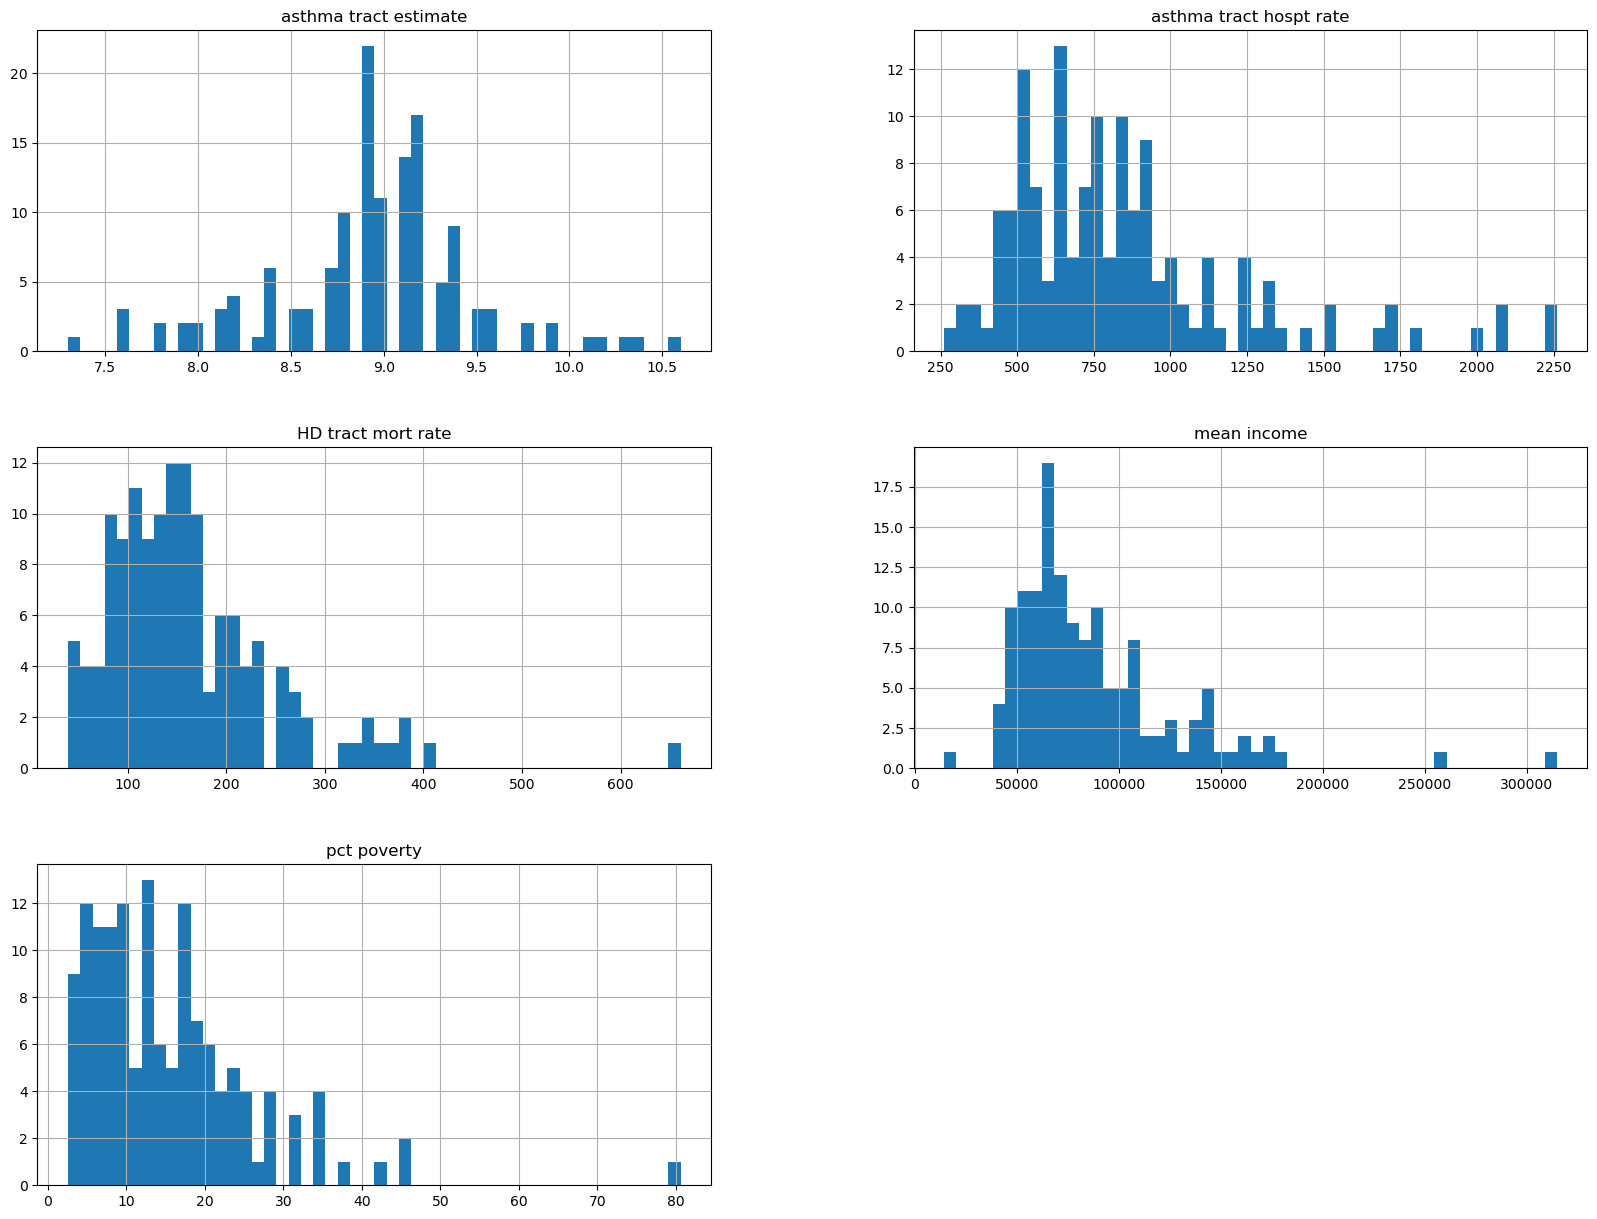

In [16]:
## Create histograms to look at distribution of features
features.hist(bins=50, figsize=(20,15))

#### The other features look to be relatively normally distributed, although slightly skewed on some.  There are some pretty big outliers in heart disease mortality rate, mean income, and percent poverty. Creating BoxPlots of these features will give a better understanding of what these outliers look like. This also shows us that we will have to scale our data when running regression analysis since the scales of these features are vastly different from each other, and the scale of tree canopy percentage. 

#### Create Boxplots to better visualize the outliers


<Axes: xlabel='mean income'>

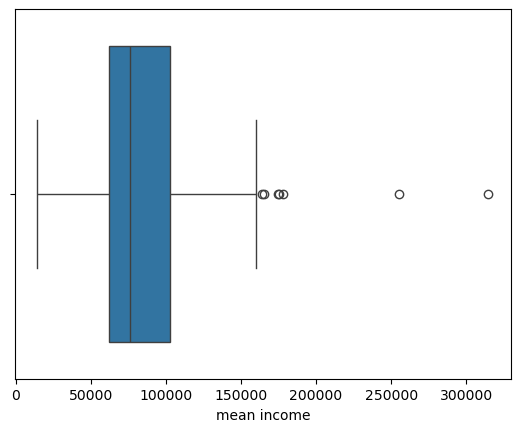

In [17]:
sns.boxplot(x = features['mean income'])




<Axes: xlabel='pct poverty'>

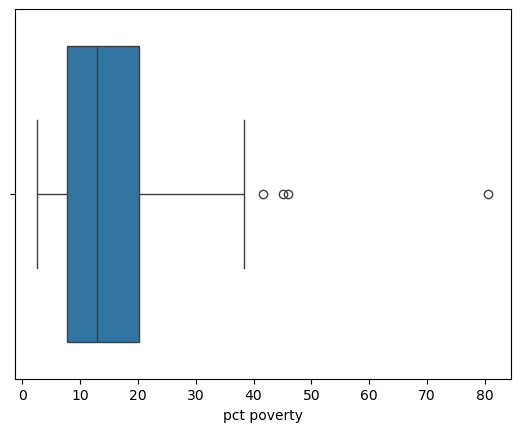

In [18]:
sns.boxplot(x = features['pct poverty'])

<Axes: xlabel='HD tract mort rate'>

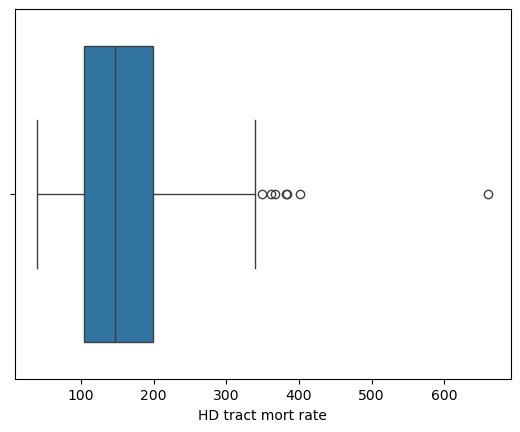

In [19]:
sns.boxplot(x = features['HD tract mort rate'])

We can see from the box plots below that the disparity in income and percent poverty is huge in this city. the difference between the lowest mean income, and the highest mean income is almost $300,000 and for percentage of people in poverty, that difference is almost 80%. 

The HD mortality rate has a huge outlier as well, at this point, it is unclear if these outliers will have a huge impact on the correlation and regression analysis. 



### EDA Questions 

- What is the average tree canopy coverage in the city?
- What are the min and max tree canopy percentages in the city? 
- What is the average income and average percent poverty throughout the city ?
- What is the state average of adult asthma rates?
- What is the city average of adult asthma rates?
- What is the state average of asthma hospitalization rates?
- What is the city average of asthma hospitalization rates? 
- What is the state average of heart disease mortality rates?
- What is the city average of heart disease mortality rates?



####  The min and max tree percentage will be used as the low and high ends of a range of numbers used to create a test data set to use in making predictions with our regression analysis in phase 3

In [20]:
#Get Average tree canopy cover for city  Phase 1

cur.execute("""SELECT AVG(tree_canopy_pct) AS avg_canopy FROM Denver_Canopy_Assessment""")
avg_canopy = cur.fetchall()

avg_canopy_df = pd.DataFrame(avg_canopy)

#isolate avg canopy pct and cast as float and round to 2 decimal places
avg_canopy = float(avg_canopy_df._get_value(0,0))

avg_canopy = round(avg_canopy,2)


# GET min and max tree percentages in the city

cur.execute('''SELECT MIN(tree_canopy_pct) AS min_pct, MAX(tree_canopy_pct) AS max_pct
               FROM Denver_Canopy_Assessment''')
min_max_pct = cur.fetchall()
min_max_pct = pd.DataFrame(min_max_pct)


min_pct = float(min_max_pct._get_value(0,0))
max_pct = float(min_max_pct._get_value(0,1))

print('avg', avg_canopy, 'min', min_pct, 'max', max_pct )

avg 24.62 min 1.27 max 52.46


In [21]:
#Get Average income for City
cur.execute("""SELECT AVG(mean_income) AS avg_income FROM income_poverty""")
avg_income = cur.fetchall()

avg_income_df = pd.DataFrame(avg_income)


#isolate avg income and cast as float and round to 2 decimal places
avg_income = float(avg_income_df._get_value(0,0))

avg_income = round(avg_income,2)

print('avg income', avg_income)

avg income 87835.36


In [22]:
#Get Average percentage of people in poverty  for City PHASE 1
cur.execute("""SELECT AVG(percent_poverty) AS avg_pct_pov FROM income_poverty""")
avg_pct_pov = cur.fetchall()

avg_pct_pov_df = pd.DataFrame(avg_pct_pov)


#isolate avg percent poverty and cast as float and round to 2 decimal places
avg_pct_pov = float(avg_pct_pov_df._get_value(0,0))

avg_pct_pov = round(avg_pct_pov,2)
print('avg pct poverty', avg_pct_pov)

avg pct poverty 15.34


In [23]:

#find state asthma prevalence estimate 

cur.execute('''SELECT AVG(asthma_state_estimate) AS state_estimate FROM Asthma_Prevalence_Tree_Pct''')
state_estimate = cur.fetchall()
state_estimate = pd.DataFrame(state_estimate)

state_estimate = float(state_estimate._get_value(0,0))

print('avg adult asthma state estimate', state_estimate)
print('avg adult asthma city estimate', avg_tract_est)

avg adult asthma state estimate 8.9
avg adult asthma city estimate 8.88


### Looking at these comparisons of numbers from city to state wide averages below, there is a higher level average in the city for both heart disease mortality and asthma hospitalization rates, but the adult asthma prevalence estimates is the same from the city to state wide. This may indicate that we aren't going to see much of a relationship for predicting better health outcomes, since we aren't really seeing better or worse outcomes. 

In [24]:


#find state hospitalization rate 

cur.execute('''SELECT AVG(asthma_state_hosp_rate) AS state_asthma_hosp_rate FROM Asthma_Hosp_Tree_pct''')
state_asthma_hosp_rate = cur.fetchall()
state_asthma_hosp_rate = pd.DataFrame(state_asthma_hosp_rate)

state_asthma_hosp_rate = float(state_asthma_hosp_rate._get_value(0,0))


print('asthma hospital rate state avg.', state_asthma_hosp_rate)
print('asthma hospital rate city avg.', avg_tract_rate)

asthma hospital rate state avg. 637.8
asthma hospital rate city avg. 841.02


In [25]:

#find state HD mortality rate

cur.execute('''SELECT AVG(HD_state_mort_rate) AS state_HD FROM HD_mort_tree_Pct''')
state_HD = cur.fetchall()
state_HD = pd.DataFrame(state_HD)

state_HD = float(state_HD._get_value(0,0))


print('Heart disease mortality rate state avg.', state_HD)
print('Heart disease mortality rate city avg.', avg_HD_tract_rate)


Heart disease mortality rate state avg. 128.61
Heart disease mortality rate city avg. 159.95


### EDA Questions 

- Where in the city do the asthma hospitalization rates fall below the state average?
- What are the cardiovascular mortality rates in the various census tracts?
- Where in the city do the cardiovascular mortality rates fall below the state average?


In [26]:
#tracts where asthma hospitalization is below state average
cur.execute('''SELECT Denver_canopy_assessment.FIPS_code, census_tract_name, Asthma_Hosp_Tree_pct.tree_canopy_pct, asthma_tract_hosp_rate
               FROM Denver_canopy_assessment, Asthma_Hosp_Tree_pct
               WHERE asthma_tract_hosp_rate < asthma_state_hosp_rate
                AND Denver_canopy_assessment.FIPS_code = Asthma_Hosp_Tree_pct.FIPS_code''')

low_asthma_hospt = cur.fetchall()
low_asthma_hospt_df = pd.DataFrame(low_asthma_hospt)

#rename columns 
low_asthma_hospt_atts = { 0: 'FIPS code',
                     1: 'Census tract name',
                     2:'tree canopy pct',
                     3: 'asthma tract hospt rate'
                    }

low_asthma_hospt_df = low_asthma_hospt_df.rename(columns = low_asthma_hospt_atts)

#change data types to run analysis 
low_asthma_hospt_df ['FIPS code'] = low_asthma_hospt_df ['FIPS code'].astype(str)
low_asthma_hospt_df ['Census tract name'] = low_asthma_hospt_df ['Census tract name'].astype(str)
low_asthma_hospt_df ['tree canopy pct'] = low_asthma_hospt_df['tree canopy pct'].astype(float)
low_asthma_hospt_df ['asthma tract hospt rate'] = low_asthma_hospt_df['asthma tract hospt rate'].astype(float)




In [27]:
#tracts where heart disease mortality is below state average
cur.execute('''SELECT Denver_canopy_assessment.FIPS_code, census_tract_name, HD_mort_tree_pct.tree_canopy_pct, HD_tract_mort_rate
               FROM Denver_canopy_assessment, HD_mort_tree_pct 
               WHERE HD_tract_mort_rate < HD_state_mort_rate
                AND Denver_canopy_assessment.FIPS_code = HD_mort_tree_pct.FIPS_code''')

low_HD_mort = cur.fetchall()
low_HD_mort_df = pd.DataFrame(low_HD_mort)

#rename columns 
low_HD_mort_atts = { 0: 'FIPS code',
                     1: 'Census tract name',
                     2:'tree canopy pct',
                     3: 'HD tract mort rate'
                    }

low_HD_mort_df = low_HD_mort_df.rename(columns = low_HD_mort_atts)

#change data types to run analysis 
low_HD_mort_df  ['FIPS code'] = low_HD_mort_df  ['FIPS code'].astype(str)
low_HD_mort_df ['Census tract name'] = low_HD_mort_df  ['Census tract name'].astype(str)
low_HD_mort_df  ['tree canopy pct'] = low_HD_mort_df ['tree canopy pct'].astype(float)
low_HD_mort_df  ['HD tract mort rate'] = low_HD_mort_df ['HD tract mort rate'].astype(float)




In [28]:
#tracts where adult asthma prevalence is below state average
cur.execute('''SELECT Denver_canopy_assessment.FIPS_code, census_tract_name, Asthma_Prevalence_Tree_pct.tree_canopy_pct, asthma_tract_estimate
               FROM Denver_canopy_assessment, Asthma_Prevalence_Tree_pct 
               WHERE asthma_tract_estimate < asthma_state_estimate
                AND Denver_canopy_assessment.FIPS_code = Asthma_Prevalence_Tree_pct.FIPS_code''')

low_adult_asthma = cur.fetchall()
low_adult_asthma_df = pd.DataFrame(low_adult_asthma)

#rename columns 
low_adult_asthma_atts = { 0: 'FIPS code',
                     1: 'Census tract name',
                     2:'tree canopy pct',
                     3: 'asthma tract estimate'
                    }

low_adult_asthma_df = low_adult_asthma_df.rename(columns = low_adult_asthma_atts)

#change data types to run analysis 
low_adult_asthma_df ['FIPS code'] = low_adult_asthma_df ['FIPS code'].astype(str)
low_adult_asthma_df ['Census tract name'] = low_adult_asthma_df ['Census tract name'].astype(str)
low_adult_asthma_df ['tree canopy pct'] = low_adult_asthma_df['tree canopy pct'].astype(float)
low_adult_asthma_df ['asthma tract estimate'] = low_adult_asthma_df['asthma tract estimate'].astype(float)




## PHASE 2 CORRELATION ANALYSIS

#### This phase will consist of analyzing relationships between these variables using Pearson's r correlation.  We are looking specifically at linear relationships, and the questions we are interested in are:

- Is there a correlation between tree canopy cover and positive health outcomes regarding prevalence of adult asthma based on census tracts ? 

- Is there a correlation between tree canopy cover and positive health outcomes regarding asthma hospitalization rates based on census tracts?
                
- Is there a correlation between tree canopy cover and positive health outcomes regarding cardiovascular mortality rates based on census tracts?

- Is there a correlation between tree canopy cover and income levels based on census tracts?

- Is there a correlation between tree canopy cover and the percentage of people in poverty in the census tracts?


#### Correlation Questions:
- Is there a correlation between tree canopy cover and positive health outcomes regarding prevalence of adult asthma based on census tracts ? 
    
        - Hypotheses:
    
           H1 = There is a negative correlation between canopy cover and adult asthma prevalence 
           ( higher tree cover = less asthma prevalence)
        
           H0 = There is no significant change in asthma prevalence with regard to tree canopy coverage

<Axes: xlabel='tree canopy pct', ylabel='asthma tract estimate'>

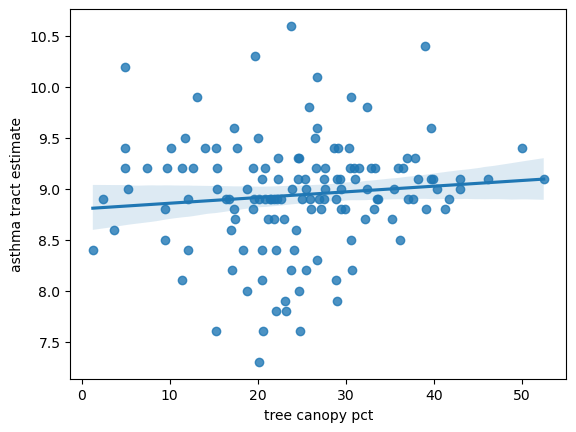

In [29]:
#looking at adult asthma prevalence
sns.regplot(x = labels_df['tree canopy pct'], y = features['asthma tract estimate'])




In [30]:
# Calculate pearson coefficient and p-value

pearson_coef, p_value = scipy.stats.pearsonr( labels_df['tree canopy pct'], features['asthma tract estimate'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)





The Pearson Correlation Coefficient is 0.10116659425300813  with a P-value of P = 0.23601396440174963


####  FAIL TO REJECT THE NULL HYPOTHESIS.
#### This Correlation Coefficient shows that there is not much of a correlation relationship between tree canopy percentage and adult asthma prevalence, and with a p-value of 0.236, we fail to reject the null hypothesis:  There is no significant change in adult asthma prevalance with regard to tree canopy percentage

#### Correlation Questions:
- Is there a correlation between tree canopy cover and positive health outcomes regarding asthma hospitalization rates based on census tracts?
        
        - Hypotheses: 
   
           H1 = There is a negative correlation between canopy cover and asthma hospitalization rates 
           ( higher tree cover = lower hospitalization rates)
           
           
           H0 = There is no significant change in asthma hospitalization rates with regard to tree canopy coverage

<Axes: xlabel='tree canopy pct', ylabel='asthma tract hospt rate'>

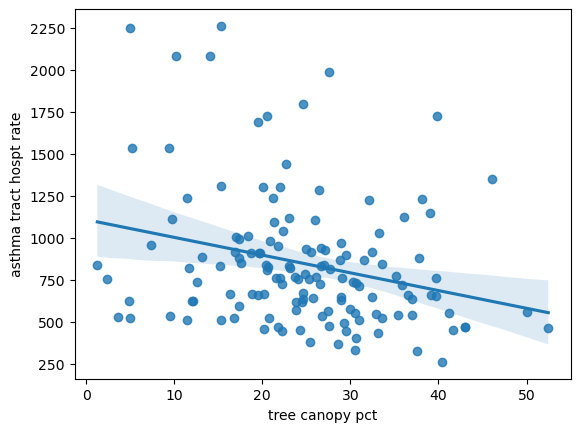

In [31]:

## looking at asthma hospitalization rates

sns.regplot(x = labels_df['tree canopy pct'], y = features['asthma tract hospt rate'])




In [32]:
# Calculate pearson coefficient and p-value

pearson_coef, p_value = scipy.stats.pearsonr(labels_df['tree canopy pct'], features['asthma tract hospt rate'])

print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)



The Pearson Correlation Coefficient is -0.2681745131997089  with a P-value of P = 0.001413621301184312


#### REJECT THE NULL HYPOTHESIS
#### This correlation coefficient shows a low nevative correlation relationship between tree canopy percentage and asthma hospitalization rates. It is not as high as we had hoped, but with the p-value of 0.0014 we can reject the null hypothesis, and state that there is a chance that tree canopy percentage can result in lower asthma hospitalization rates

#### Correlation Questions:
- Is there a correlation between tree canopy cover and positive health outcomes regarding cardiovascular mortality rates based on census tracts?

         - Hypotheses: 
     
            H1 = There is a negative correlation between canopy cover and heart disease mortality rates 
            ( higher tree cover = lower mortality rates)
         
            H0 = There is no significant change in heart disease mortality rates with regard to tree canopy cover
         

<Axes: xlabel='tree canopy pct', ylabel='HD tract mort rate'>

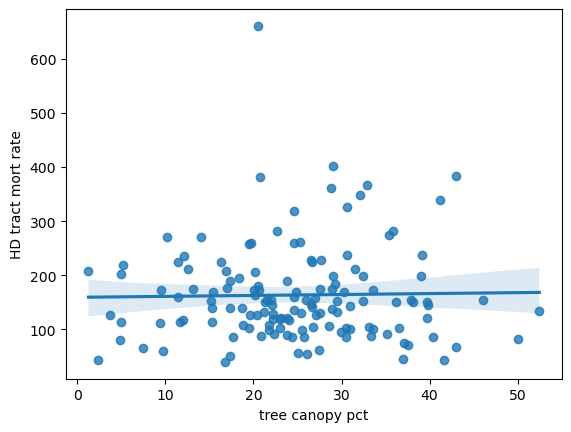

In [33]:
### looking at heart disease mortality rates

sns.regplot(x = labels_df['tree canopy pct'], y = features['HD tract mort rate'])

In [34]:
# Calculate pearson coefficient and p-value

pearson_coef, p_value = scipy.stats.pearsonr(labels_df['tree canopy pct'], features['HD tract mort rate'])

print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)


The Pearson Correlation Coefficient is 0.019495114466864083  with a P-value of P = 0.819809414118384


#### FAIL TO REJECT THE NULL HYPOTHESIS 
#### This Correlation Coefficient shows that there is virtually no relationship between tree canopy coverage and heart disease mortality and with a p-value of 0.82, we fail to reject that there is no significant change in heart disease mortality rates with regard to tree canopy coverage

#### Correlation Questions:

- Is there a correlation between tree canopy cover and income levels based on census tracts?

         - Hypotheses: 
     
     
            H1 = There is a positive correlation between canopy cover and mean income in census tracts 
            ( higher tree cover = higer mean income)
           
           
            H0 = There is no significant change in mean income levels with regard to tree canopy coverage

<Axes: xlabel='tree canopy pct', ylabel='mean income'>

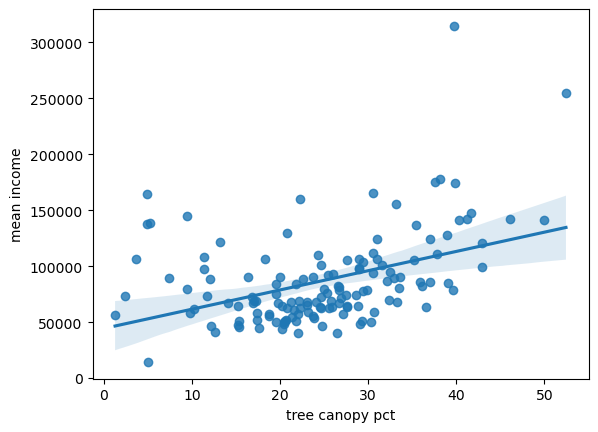

In [35]:
### looking at mean income

sns.regplot(x = labels_df['tree canopy pct'], y = features['mean income'])

In [36]:
# Calculate pearson coefficient and p-value

pearson_coef, p_value = scipy.stats.pearsonr(labels_df['tree canopy pct'], features['mean income'])

print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)


The Pearson Correlation Coefficient is 0.42076354407315497  with a P-value of P = 2.504000852018248e-07


#### REJECT THE NULL HYPOTHESIS
#### This correlation coefficient shows that there is a positive correlation between mean income in a census tract and the level of tree canopy coverage. With a p-value of 0.00000025, we can reject the null hypothesis

#### Correlation Questions: 

- Is there a correlation between tree canopy cover and the percentage of people in poverty in the census tracts?

        - Hypotheses: 
    
    
            H1 = There is a negative correlation between canopy cover and percent poverty 
            ( higher tree cover = lower percentage of people in poverty)
           
               
            H0 = There is no significant change in poverty rates with regard to tree canopy coverage
        


<Axes: xlabel='tree canopy pct', ylabel='pct poverty'>

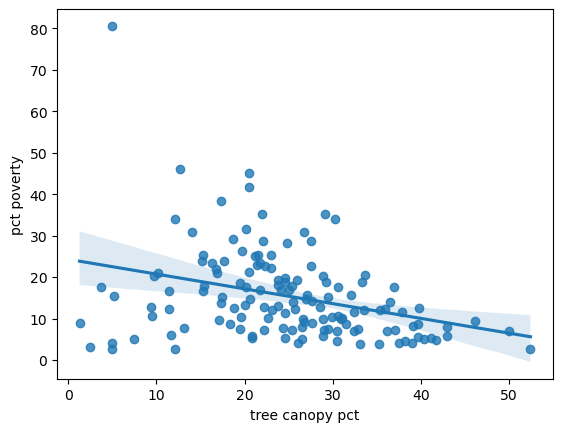

In [37]:
### looking at percentage of poverty 

sns.regplot(x = labels_df['tree canopy pct'], y = features['pct poverty'])




In [38]:
# Calculate pearson coefficient and p-value

pearson_coef, p_value = scipy.stats.pearsonr(labels_df['tree canopy pct'], features['pct poverty'])

print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)



The Pearson Correlation Coefficient is -0.328269398640338  with a P-value of P = 7.973711038080617e-05


#### REJECT THE NULL HYPOTHESIS
#### This correlation coefficient shows that there is a negative correlation between percentage of poverty and tree canopy coverage, with a p-value of 0.0000797, we can reject the null hypothesis that there is no significant change in poverty rates with regard to tree canopy coverage.

#### Correlation Results of various features vs tree canopy percentage

- Adult Asthma Prevalence -  Fail to Reject the Null Hypothesis - No Correlation 

- Asthma Hospitalization Rates - Reject Null Hypothesis - low negative correlation

- Heart Disease Mortality Rates - Fail to Reject the Null Hypothesis - No Correlation

- Mean Income of Tract - Reject the Null Hypothesis - positive correlation

- Percent Poverty  - Reject the Null Hypothesis - negative correlation

## PHASE 3 REGRESSION ANALYSIS 

#### There are three specific health issues I wish to look at with regards to tree canopy cover. There were three separate regression models that look at tree coverage in census tracts and seeing where the different rates of these heath incidents fall. These regression analyses are detailed here:

   1. Asthma hospitalization rates per 100,000 people in the different census tracts around the city vs. tree canopy cover in these census tracts. The features will be tree canopy cover and the response would be hospitalization rate. The predictive model will show at what percentage of tree canopy cover is the asthma hospitalization rate dropping below the state average.
    
    
   2. Cardiovascular disease mortality rate per 100,000 people in the different census tracts around the cityvs. tree canopy cover in these census tracts. The features will be tree canopy cover and the response would be hospitalization rate. The predictive model will show at what percentage of tree canopy cover is the Cardiovascular disease mortality rate dropping below the state average
    
    
   3. Adult asthma prevalence in different census tracts vs. tree canopy cover. Feature will be tree canopy cover and response would be the number of reported adult asthma cases. The predictive model will show at what percentage of tree cover do adult asthma cases drop below state average.
   

#### However, since our correlation analysis only showed one relationship we can use, the asthma hospitalization rate, there will only be one semi-useful regression model here.


#### Regression Analysis  - Create a linear regression model using the relationship between Asthma Hospitalization Rates and Tree Canopy Percentage to predict at what percentage of canopy coverage does the Asthma Hospitalization Rate start to drop below the state average in order to be considered a positive health outcome

In [39]:
## import Linear Regression class from sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

##test set should be about 20% of the data set aside ##
##set random generated seed to make results reproducable ##
X_train, X_test, y_train, y_test = train_test_split(np.array(labels_df['tree canopy pct']),  np.array(features['asthma tract hospt rate']), test_size = 0.2, random_state = 42)


#create object for the Linear Regression Class
lin_reg_asthma_hospt = LinearRegression()

#Train Model

lin_reg_asthma_hospt.fit(X_train.reshape(-1,1), y_train)

#get intercept and coefficient 
print('The intercept is: ', lin_reg_asthma_hospt.intercept_ )
print('The Coefficient is: ', lin_reg_asthma_hospt.coef_)







#Get R squared Score of the model
print('The R Squared Score of the model is: ', lin_reg_asthma_hospt.score(X_train.reshape(-1,1),y_train))

The intercept is:  983.884272762528
The Coefficient is:  [-7.24664374]
The R Squared Score of the model is:  0.04082699125822431


#### This R squared value is incredibly low, almost 0. This indicates, that while there was a low correlation between these two variables, Tree canopy percentage does not account for much in the way of Asthma Hospitalization Rates being dependent on it, and therefore the model does a bad job of explainign the variance in the data and is fitting poorly. 

### Testing and Evaluating the predictions of the model 

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

y_pred = lin_reg_asthma_hospt.predict(X_test.reshape(-1,1))

lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)

print('The Root Mean Squared Error of the model is: ', lin_rmse)



lin_mae = mean_absolute_error(y_test, y_pred)
print('The Mean Absolute Error of the model is: ', lin_mae)

lin_mape = mean_absolute_percentage_error(y_test, y_pred)
print('The Mean Absolute Percentage Error of the model is: ', lin_mape)

The Root Mean Squared Error of the model is:  494.4919972583962
The Mean Absolute Error of the model is:  364.5083519788356
The Mean Absolute Percentage Error of the model is:  0.34886115230258313


#### These scores further illustrate that the model is a bad fit, and therefore not good at makeing the predictions we want it to. Since we know the hospital rates range from around 250 to 2250 the RMSE is showing that the unexplained variance has a standard deviation of 494.5. This model is not good at making predictions, and when we calculate the mean absolute percentage error, we can see that our prediction are off, on average, by 34.8 percent. 



In [41]:
#CREATE NEW DATASET OF RANGE OF TREE CANOPY PERCENTAGES TO PREDICT
# AT WHAT PCT DO ASTHMA HOSPT RATES FALL BELOW STATE AVG OF 637.8

X_new = np.array([np.arange(min_pct,max_pct)])

y_pred = lin_reg_asthma_hospt.predict(X_new.reshape(-1,1))


predictions = np.concatenate((X_new.reshape(-1,1), y_pred.reshape(-1,1)), axis = 1)

preds_df = pd.DataFrame(predictions, columns = ['tree pct', 'tract rate'])

percentage_df = preds_df.loc[preds_df['tract rate'] < state_asthma_hosp_rate ]

percentage_df


,tree pct,tract rate
47,48.27,634.088779
48,49.27,626.842136
49,50.27,619.595492
50,51.27,612.348848
51,52.27,605.102204


Using this model to predict what percentage of tree cover correlates to positive health outcomes with regards to astham hospitalization shows that over 48% canopy coverage is needed to start seeing results. This can be a prohibitive amount of canopy coverage in a city, so there must be more variables that relate to this health outcome. 

### There was no correlation between tree canopy coverage and the other two health issues, and we failed to reject the null hypothesis for both of them. For the sake of this project, regression analysis was still run, and the results further highlight the lack of a linear relationship between these variables. 

#### Adult Asthma Prevalence Regression Model analysis 

In [42]:
### asthma Prevalence
#test set should be about 20% of the data set aside ##
##set random generated seed to make results reproducable ##
X_train1, X_test1, y_train1, y_test1 = train_test_split(np.array(labels_df['tree canopy pct']),  np.array(features['asthma tract estimate']), test_size = 0.2, random_state = 42)


#create object for the Linear Regression Class
line_reg1 = LinearRegression()

#Train Model

line_reg1.fit(X_train1.reshape(-1,1), y_train1)

#get intercept and coefficient 
print('The intercept is: ', line_reg1.intercept_ )
print('The Coefficient is: ', line_reg1.coef_)







#Get R squared Score of the model
print('The R Squared Score of the model is: ', line_reg1.score(X_train1.reshape(-1,1),y_train1))



The intercept is:  8.793275095423175
The Coefficient is:  [0.00469711]
The R Squared Score of the model is:  0.006793235051324342


#### This models R squared value is virtually zero telling us there is no explaination of the variance in the data, and this is not going to predict well. Furthermore, the coefficient is positive, and very small, showing that there isn't a negative relationship between these variables as we were looking for, and the change in value of the dependent variable is insignificant. 

#### Heart Disease Mortality Regression Model analysis 

In [43]:
##HD mortality 

#test set should be about 20% of the data set aside ##
##set random generated seed to make results reproducable ##
X_train2, X_test2, y_train2, y_test2 = train_test_split(np.array(labels_df['tree canopy pct']),  np.array(features['HD tract mort rate']), test_size = 0.2, random_state = 42)


#create object for the Linear Regression Class
line_reg2 = LinearRegression()

#Train Model

line_reg2.fit(X_train2.reshape(-1,1), y_train2)

#get intercept and coefficient 
print('The intercept is: ', line_reg2.intercept_ )
print('The Coefficient is: ', line_reg2.coef_)







#Get R squared Score of the model
print('The R Squared Score of the model is: ', line_reg2.score(X_train2.reshape(-1,1),y_train2))



The intercept is:  147.5444557449139
The Coefficient is:  [0.38758514]
The R Squared Score of the model is:  0.002485040050220322


#### Again with an R squared of virtually 0, this model doesn't do much to explain the relationship between the variables. This model is a bad fit and shows nothing significant. 

### Non-Linear Modeling: Tree Canopy & Health Outcomes
This notebook continues from the original Denver analysis. Here, we use Random Forest to model asthma hospitalization rates using tree canopy and socioeconomic data.

In [44]:
## importing some more packages to do random forest modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 



In [51]:
## CREATE ONE DATAFRAME TO PULL POSSIBLE FEATURES AND LABELS OUT OF

rand_forest_data_1 = [income_tree_df['FIPS code'],  asthma_hospt_tree_df['asthma tract hospt rate'],income_tree_df['mean income'], pov_tree_df['pct poverty'], income_tree_df['tree canopy pct']]

columns = ['FIPS codes', 'asthma tract hospt rate', 'mean income', 'pct poverty', 'tree canopy pct' ]

rand_forest_features_df = pd.concat(rand_forest_data_1, axis = 1, keys = columns)
rand_forest_features_df = rand_forest_features_df.dropna()

#create labels from features df - this will be used for random forest regression 
rand_forest_target_df = pd.DataFrame(rand_forest_features_df['asthma tract hospt rate'])

#drop asthma tract hospt rate  from features
rand_forest_features_df = rand_forest_features_df.drop(['asthma tract hospt rate'], axis = 1)

#print data frames
print(rand_forest_features_df)
print(rand_forest_target_df)

     FIPS codes  mean income  pct poverty  tree canopy pct
0    8031000102     106831.0          9.9            28.91
1    8031000201      68907.0          9.7            17.05
2    8031000202      67871.0         22.3            23.03
3    8031000301      94694.0          6.9            32.45
4    8031000302     123993.0          9.8            30.96
..          ...          ...          ...              ...
134  8031015400      79858.0         16.9            25.01
135  8031015500      58539.0         15.2            17.39
136  8031015600      51820.0         38.4            17.33
137  8031015700      64046.0         20.2            28.86
138  8031980000      56048.0          8.9             1.27

[139 rows x 4 columns]
     asthma tract hospt rate
0                     646.47
1                    1003.01
2                    1116.16
3                     645.48
4                     510.88
..                       ...
134                   933.67
135                   881.86
136    

### train random forest regressor

In [52]:
X = rand_forest_features_df
y = rand_forest_target_df


X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.2, random_state=42)

rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('R-squared:', r2_score(y_test,y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R-squared: -0.16166150026129378
MAPE: 0.3469157131261094


## visualize featues VS. Target

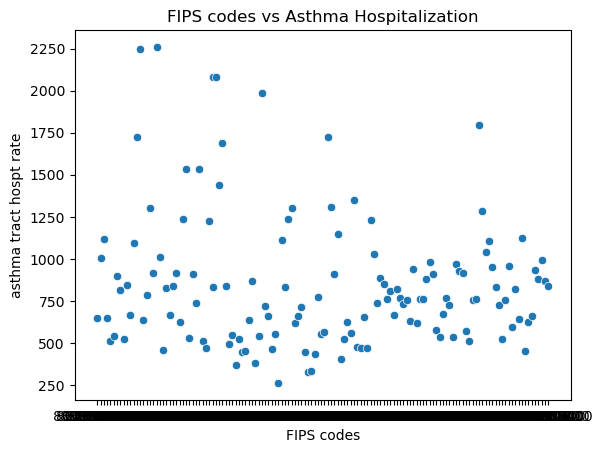

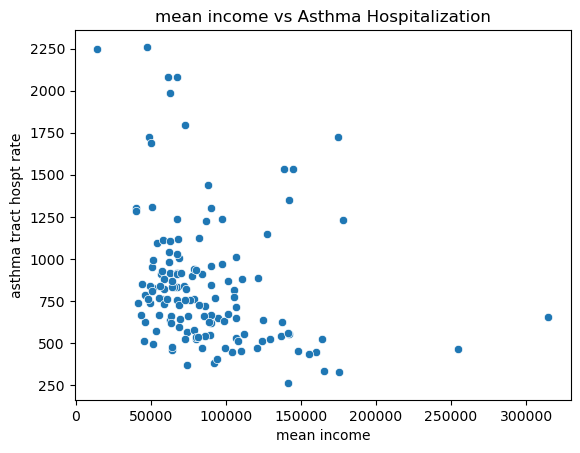

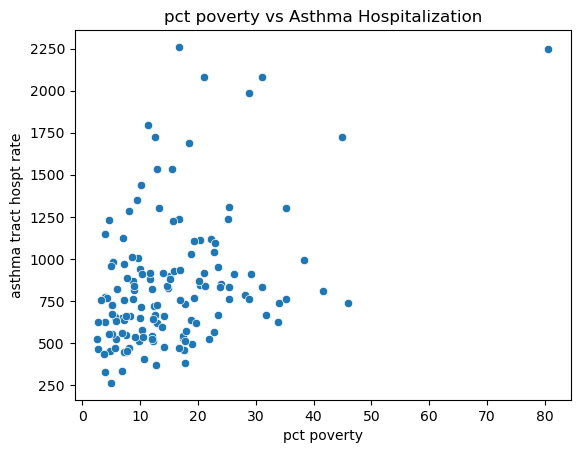

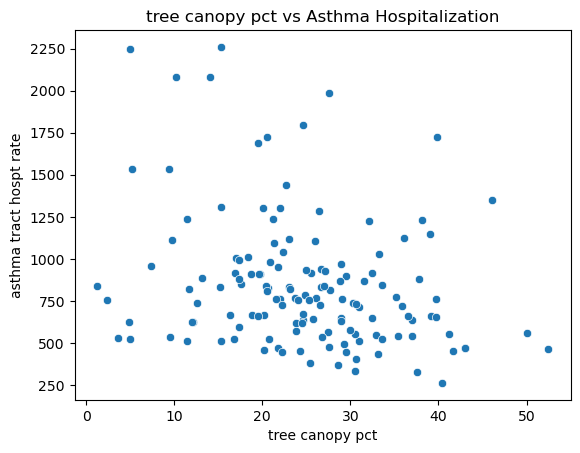

In [53]:

for col in X.columns:
    sns.scatterplot(data=X, x=col, y=y.squeeze())
    plt.title(f"{col} vs Asthma Hospitalization")
    plt.show()

## feature importance

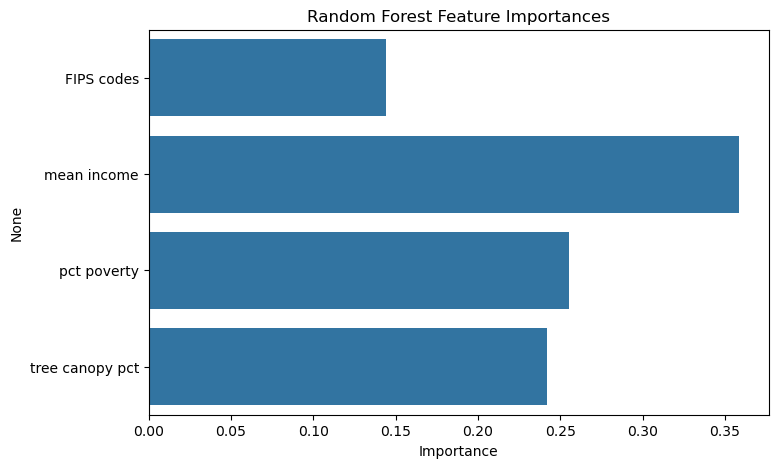

In [54]:
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.show()

## Summary and insights

We attempted to model asthma hospitalization rates across Denver census tracts using a Random Forest Regressor. The model was trained on variables including tree canopy coverage, median income, and poverty rate. However, the resulting performance metrics showed:

R²: -0.16, indicating the model explained less variance than a simple mean-based baseline

MAPE: ~35%, showing considerable prediction error

These results suggest that the selected features do not adequately explain variations in asthma hospitalization at the tract level. The weak predictive performance is consistent with earlier findings from exploratory analysis.

### Key Takeaways
- Tree canopy coverage, while important for environmental planning, is not a reliable standalone indicator of asthma health outcomes.
- Socioeconomic indicators like income and poverty may contribute, but do not capture critical health determinants on their own.
- Health outcomes are complex — likely driven by:
      - Pollution (PM2.5, NO₂)
      - Indoor housing quality
      - Medical access
      - Structural and systemic factors

